# Ch4 Effect Modification

This chapter emphasizes that **there is not such a thing as the causal effect of treatment**. Rather, the causal effect depends on the characteristics of the particular population under study.

- Definition of effect modification.
- Stratification to identify effect modification.
- Why care about effect modification?
    - The average causal effect will differ between populations.
    - The extrapolation of causal effects computed in one population to a second population is referred to as **transportability** of causal inferences across populations.
- Stratification as a form of adjustment.
- Matching as another form of adjustment.
- Effect modification and adjustment methods


The goal of matching is to construct a subset of the population in which the variables $L$ have the same distribution in both the treated and the untreated. 

## 从仰望天空开始


用仰望天空的例子讲清楚章节目录中的每个概念。


到目前为止，我们已经关注了整个目标总体的平均因果效应。但是，许多因果问题是关于子总体的。再次考虑因果问题“抬头仰望天空是否也会使其他行人抬头吗？”您可能有兴趣分别计算城市居民和游客对治疗的平均因果效应（即仰望天空），而不是计算整个行人中的平均因果效应。

The decision whether to compute average effects in the entire population or in a subset 取决于推断目标. In some cases, you may not care about the variations of the effect across different groups of individuals. For example, suppose you are a policy maker considering the possibility of implementing a nationwide water fluoridation program. Because this public health intervention will reach all households in the population, your primary interest is in the average causal effect in the entire population, rather than in particular subsets. You will be interested in characterizing how the causal effect varies across subsets of the population when the intervention can be targeted to different subsets, or when the findings of the study need to be applied to other populations.



本章强调离开了特定的总体，我们无法谈及因果效应。

## 一个简单例子

In [1]:
import numpy as np
import pandas as pd
import logging

import dowhy
from dowhy import CausalModel
import dowhy.datasets

import econml
import warnings
warnings.filterwarnings('ignore')

### 平均因果效应

我们构建一个一般的因果问题来计算 ATE。

In [12]:
data = dowhy.datasets.linear_dataset(10, num_common_causes=4, num_samples=10000,
                                    num_instruments=2, num_effect_modifiers=2,
                                     num_treatments=1,
                                    treatment_is_binary=False,
#                                      ,
#                                     num_discrete_effect_modifiers=0,
#                                     one_hot_encode=False
                                    )
df=data['df']
df.head()

X0        X1   Z0        Z1        W0        W1        W2        W3  \
0 -0.869496 -0.829653  0.0  0.773161 -2.489549  0.011868  1.261433 -1.929507   
1 -1.907581 -1.297034  1.0  0.441208  0.430182  0.038594  1.189957  0.594743   
2 -1.904767 -0.237641  1.0  0.016561 -2.082283  1.667971  0.948148 -1.891389   
3 -0.446893 -1.434080  1.0  0.468078 -1.986538  1.128416  0.226358 -1.208578   
4  0.768800 -0.031658  1.0  0.253133 -2.130161  0.474995  1.583731  0.299903   

          v0           y  
0  -3.012168  -21.078711  
1  24.769325  -38.058701  
2   5.957369   10.122296  
3   7.055077   10.941123  
4  15.560307  193.903025

INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']


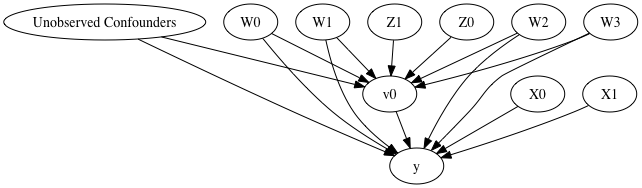

In [7]:
model = CausalModel(data=data["df"],
                    treatment=data["treatment_name"], outcome=data["outcome_name"],
                    graph=data["gml_graph"])

model.view_model()

from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [8]:

identified_estimand= model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)


INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['W2', 'W3', 'W1', 'Unobserved Confounders', 'W0']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:['Z0', 'Z1']


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                              
─────(Expectation(y|W2,W3,W1,W0))
d[v₀]                            
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W2,W3,W1,W0,U) = P(y|v0,W2,W3,W1,W0)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z0, Z1])*Derivative([v0], [Z0, Z1])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0,Z1})
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→{v0}, then ¬({Z0,Z1}→y)



In [9]:
linear_estimate = model.estimate_effect(identified_estimand,
                                        method_name="backdoor.linear_regression",
                                       control_value=0,
                                       treatment_value=1)
print(linear_estimate)

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: y~v0+W2+W3+W1+W0+v0*X0+v0*X1


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                              
─────(Expectation(y|W2,W3,W1,W0))
d[v₀]                            
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W2,W3,W1,W0,U) = P(y|v0,W2,W3,W1,W0)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z0, Z1])*Derivative([v0], [Z0, Z1])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0,Z1})
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→{v0}, then ¬({Z0,Z1}→y)

## Realized estimand
b: y~v0+W2+W3+W1+W0+v0*X0+v0*X1
## Estimate
Value: 10.000000000000004



### 条件平均因果效应

现在我们需要估计 CATE。

![](causal_model.png)

Target units 定义了要计算因果估计的 units。 可以是 a lambda function filter on the original dataframe, a new Pandas dataframe, or a string corresponding to the three main kinds of target units (“ate”, “att” and “atc”).

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
dml_estimate = model.estimate_effect(identified_estimand, method_name="backdoor.econml.dml.DMLCateEstimator",
                                     control_value = 0,
                                     treatment_value = 1,
                                 target_units = lambda df: df["X0"] < 1,  # condition used for CATE
                                 confidence_intervals=False,
                                method_params={"init_params":{'model_y':GradientBoostingRegressor(),
                                                              'model_t': GradientBoostingRegressor(),
                                                              "model_final":LassoCV(),
                                                              'featurizer':PolynomialFeatures(degree=1, include_bias=True)},
                                               "fit_params":{}})
print(dml_estimate)

INFO:dowhy.causal_estimator:INFO: Using EconML Estimator
INFO:dowhy.causal_estimator:b: y~v0+W2+W3+W1+W0


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                              
─────(Expectation(y|W2,W3,W1,W0))
d[v₀]                            
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W2,W3,W1,W0,U) = P(y|v0,W2,W3,W1,W0)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z0, Z1])*Derivative([v0], [Z0, Z1])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0,Z1})
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→{v0}, then ¬({Z0,Z1}→y)

## Realized estimand
b: y~v0+W2+W3+W1+W0
## Estimate
Value: 8.642788550773068




更多可以参见 [使用随机森林进行因果推断](https://zhuanlan.zhihu.com/p/46803675)。